### Finite Element Convergence
Copute the solution of the finite element discretisation for fixed parameter theta for different meshsizes h. Then compare the result at the 13x13 measurement points, the testing folder contains 'correct' reference solutions.

In [1]:
# imports
%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt
from forward_model import Forward_Model as fm

import time 

In [3]:
# load forward models
fm8 = fm(1/8, False,)
fm16 = fm(1/16, False)
fm32 = fm(1/32, False)
fm64 = fm(1/64, False)
fm128 = fm(1/128, False) 
fm256 = fm(1/256, False) # this model serves as the reference model to check for convergence
models = [fm128, fm64, fm32, fm16, fm8]

Negative inputs to forward model are allowed; exp(input) is passed to the model.
Negative inputs to forward model are allowed; exp(input) is passed to the model.
Negative inputs to forward model are allowed; exp(input) is passed to the model.
Negative inputs to forward model are allowed; exp(input) is passed to the model.
Negative inputs to forward model are allowed; exp(input) is passed to the model.
Negative inputs to forward model are allowed; exp(input) is passed to the model.


### Plot Output


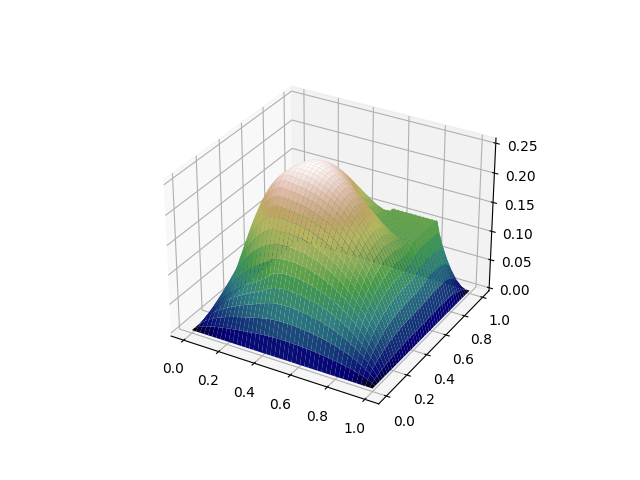

In [4]:
X,Y = np.meshgrid(np.linspace(0,1,129),np.linspace(0,1,129))
#define stiffness parameter 
theta = np.ones(64)
theta[[9,10,17,18]]  = 0.1
theta[[45,46,53,54]] = 10

_, u = fm128(theta,True) #model returns solution u and solution evaluated at measurement points

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y, np.reshape(u, (129,129)), cmap='gist_earth')

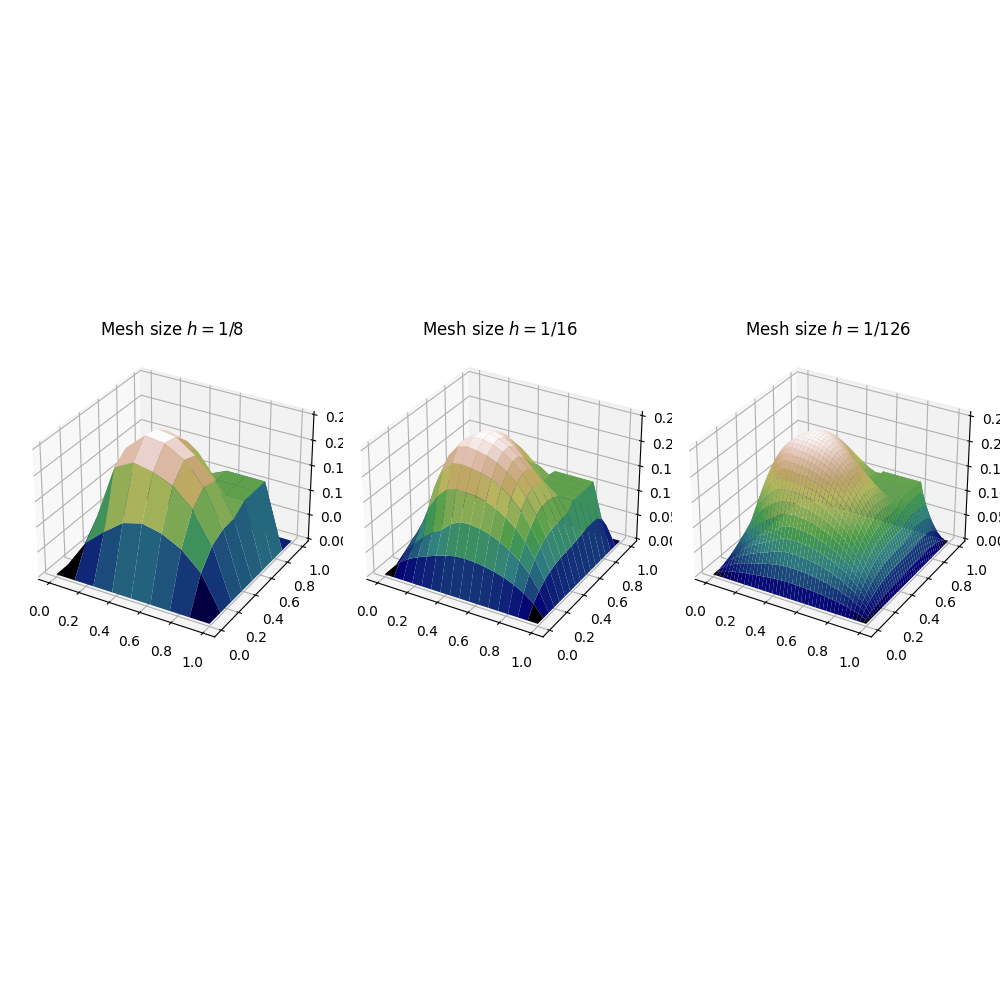

In [8]:
X1,Y1 = np.meshgrid(np.linspace(0,1,9),np.linspace(0,1,9))
X2,Y2 = np.meshgrid(np.linspace(0,1,17),np.linspace(0,1,17))
X3,Y3 = np.meshgrid(np.linspace(0,1,129),np.linspace(0,1,129))
#define stiffness parameter 
theta = np.ones(64)
theta[[9,10,17,18]]  = 0.1
theta[[45,46,53,54]] = 10

_, u1 = fm8(theta, True)
_, u2 = fm16(theta, True)
_, u3 = fm128(theta,True) #model returns solution u and solution evaluated at measurement points

fig, ax = plt.subplots(ncols=3, subplot_kw={"projection": "3d"}, figsize=(10,10))

ax[0].plot_surface(X1,Y1, np.reshape(u1, (9,9)), cmap='gist_earth')
ax[0].set_title(r'Mesh size $h=1/8$')
ax[1].plot_surface(X2,Y2, np.reshape(u2, (17,17)), cmap='gist_earth')
ax[1].set_title(r'Mesh size $h=1/16$')

ax[2].plot_surface(X3,Y3, np.reshape(u3, (129,129)), cmap='gist_earth')
ax[2].set_title(r'Mesh size $h=1/126$')

fig.tight_layout()

### Time for Forward Pass
Approximate time for one forward pass for different models:

* Model with gridlength $1/32$ : 24 ms
* Model with gridlength $1/16$ : 3.7 ms
* Model with gidlength $1/8$ : 0.9 ms



([<matplotlib.axis.XTick at 0x1ff039f4c10>,
 [Text(0, 0, '$m_{1/8}$'), Text(1, 0, '$m_{1/16}$'), Text(2, 0, '$m_{1/32}$')])

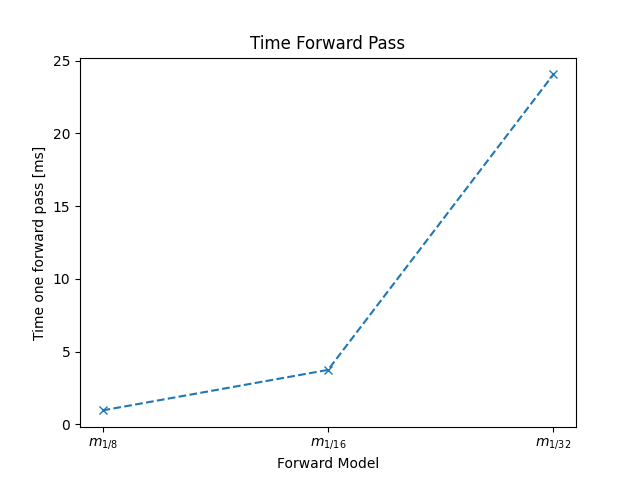

In [9]:
model_time = []

for m in [fm8, fm16, fm32]:
    local_times = np.zeros(100)
    for i in range(local_times.shape[0]):
        theta = np.random.randn(64)
        t1 = time.time()
        m(theta)
        t2 = time.time()
        local_times[i] = t2-t1
    model_time.append(local_times.mean())

fig = plt.figure()
plt.title('Time Forward Pass')
plt.plot(1000*np.array(model_time),'x--')
plt.xlabel('Forward Model')
plt.ylabel('Time one forward pass [ms]')
plt.xticks([0,1,2],[r'$m_{1/8}$',r'$m_{1/16}$',r'$m_{1/32}$'])


### Finite Element Error Convergence

In [11]:
# error computating
theta = np.zeros(64)
z_ref = fm256(theta) # reference solution to check convergence
errors = []
for m in models:
    z = m(theta)
    errors.append(np.linalg.norm(z-z_ref))


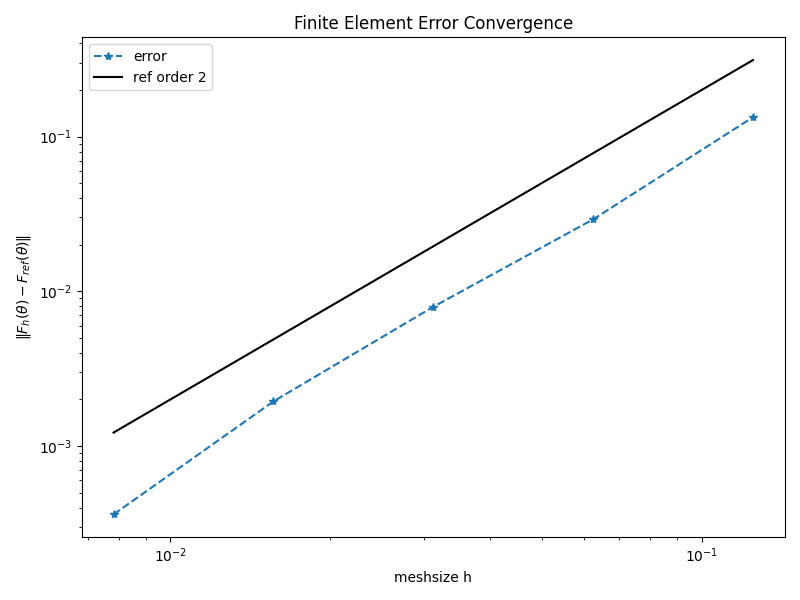

In [14]:
# plot errors on logarithmic scale
fig, ax = plt.subplots(nrows = 1, ncols=1, figsize=(8,6))

ax.loglog([1/128, 1/64,1/32,1/16,1/8], errors,'*--', label="error")

ax.set_xlabel('meshsize h')
ax.set_ylabel(r'$ \| F_h(\theta)-F_{ref}(\theta) \|$')
ax.set_title('Finite Element Error Convergence')
ax.loglog(np.linspace(1/128,1/8,1000),20*(np.linspace(1/128,1/8,1000)**2), 'k', label='ref order 2' )
fig.tight_layout()
ax.legend()


### Plot Model Output for some Proposals
Plot some model output for some proposals $\theta$ that come from MH on the coarse level. They were picked at random time steps during the algorithm. Plot the model evaluation for all there discretization levels $h$ evaluated at same proposal $\theta$. Is mainly done for checking the behavior of the DA-Algorithm for different levels.

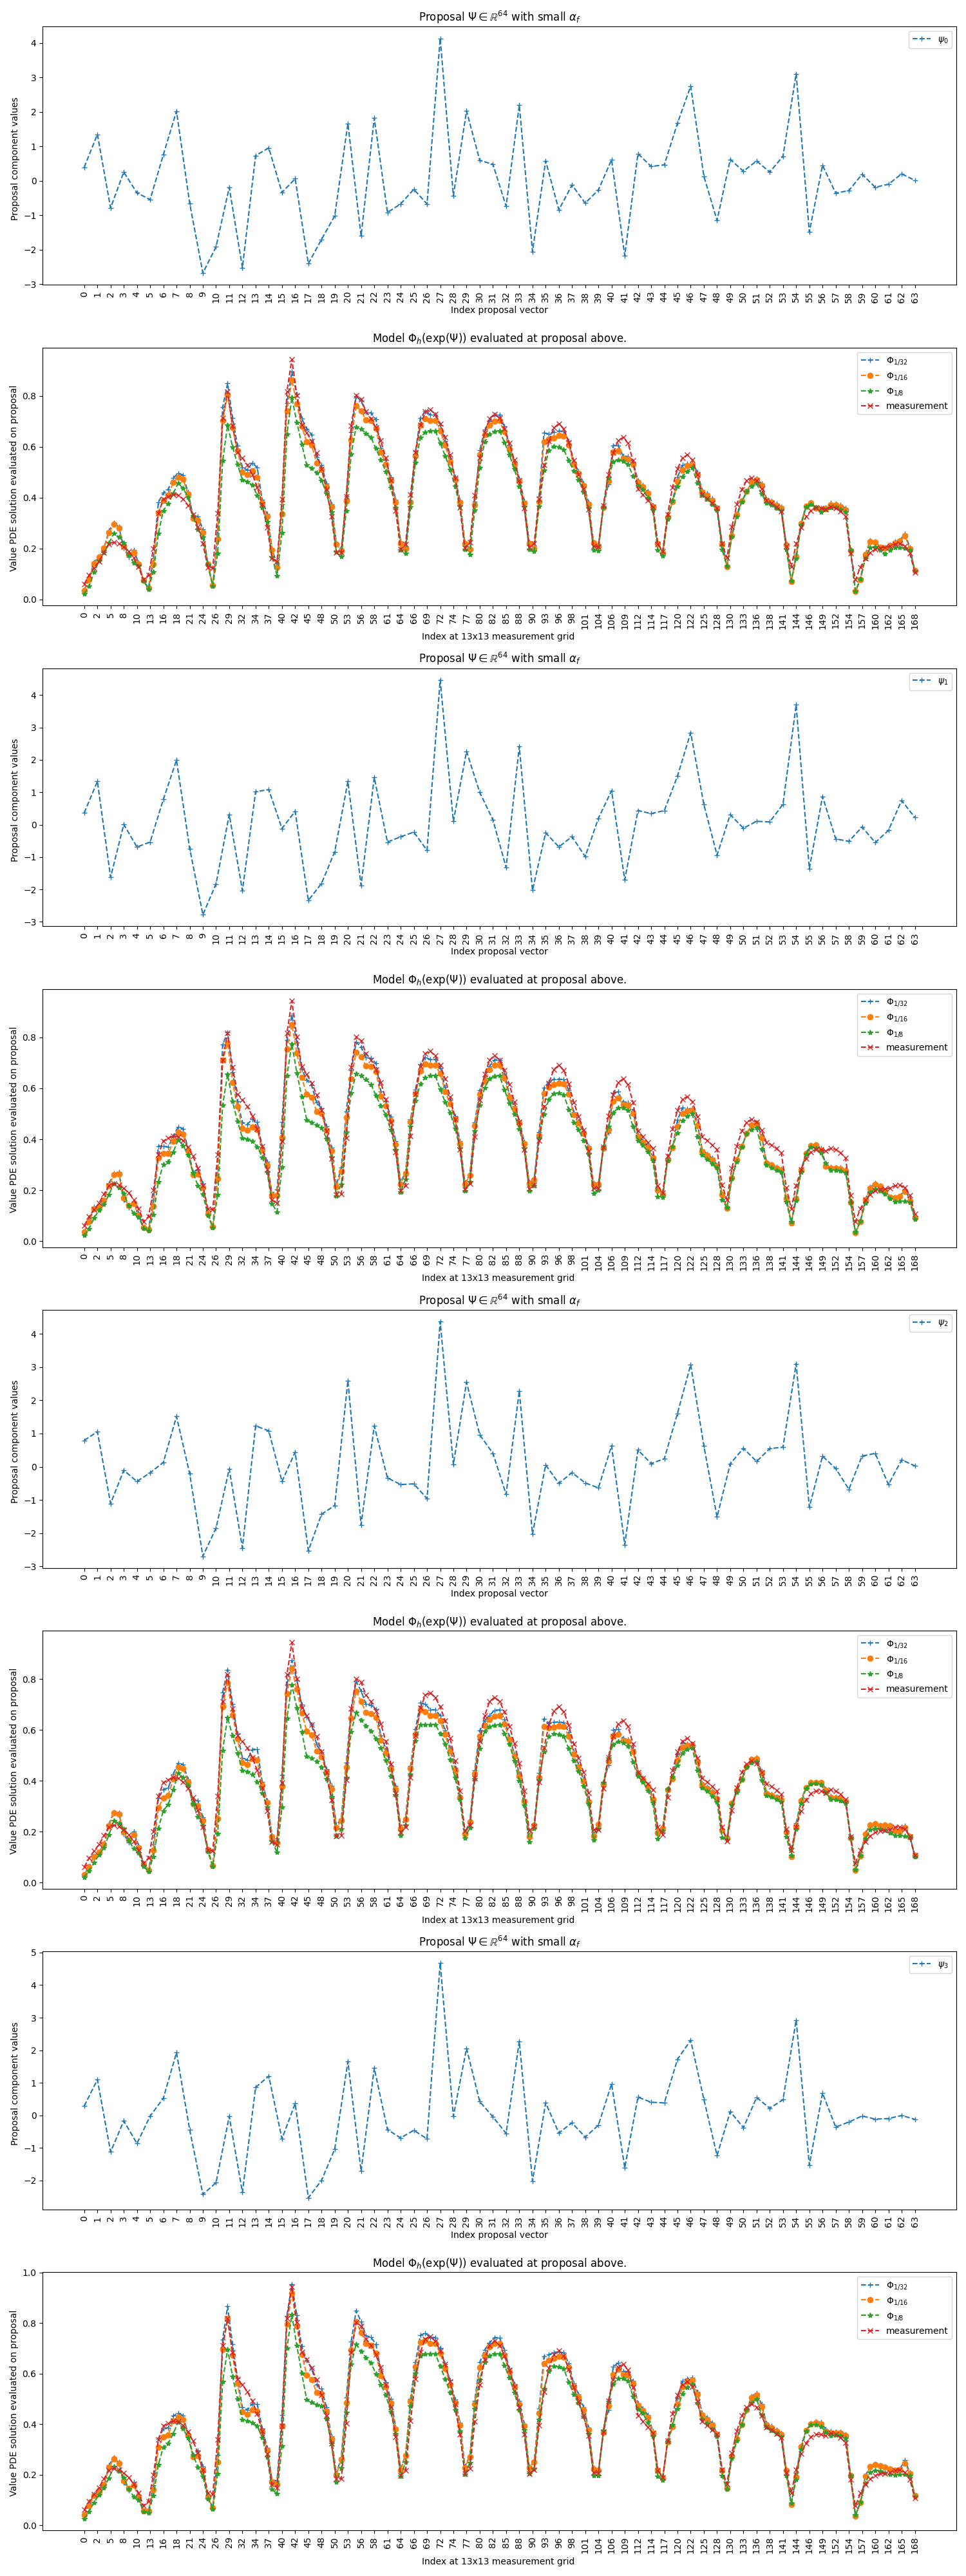

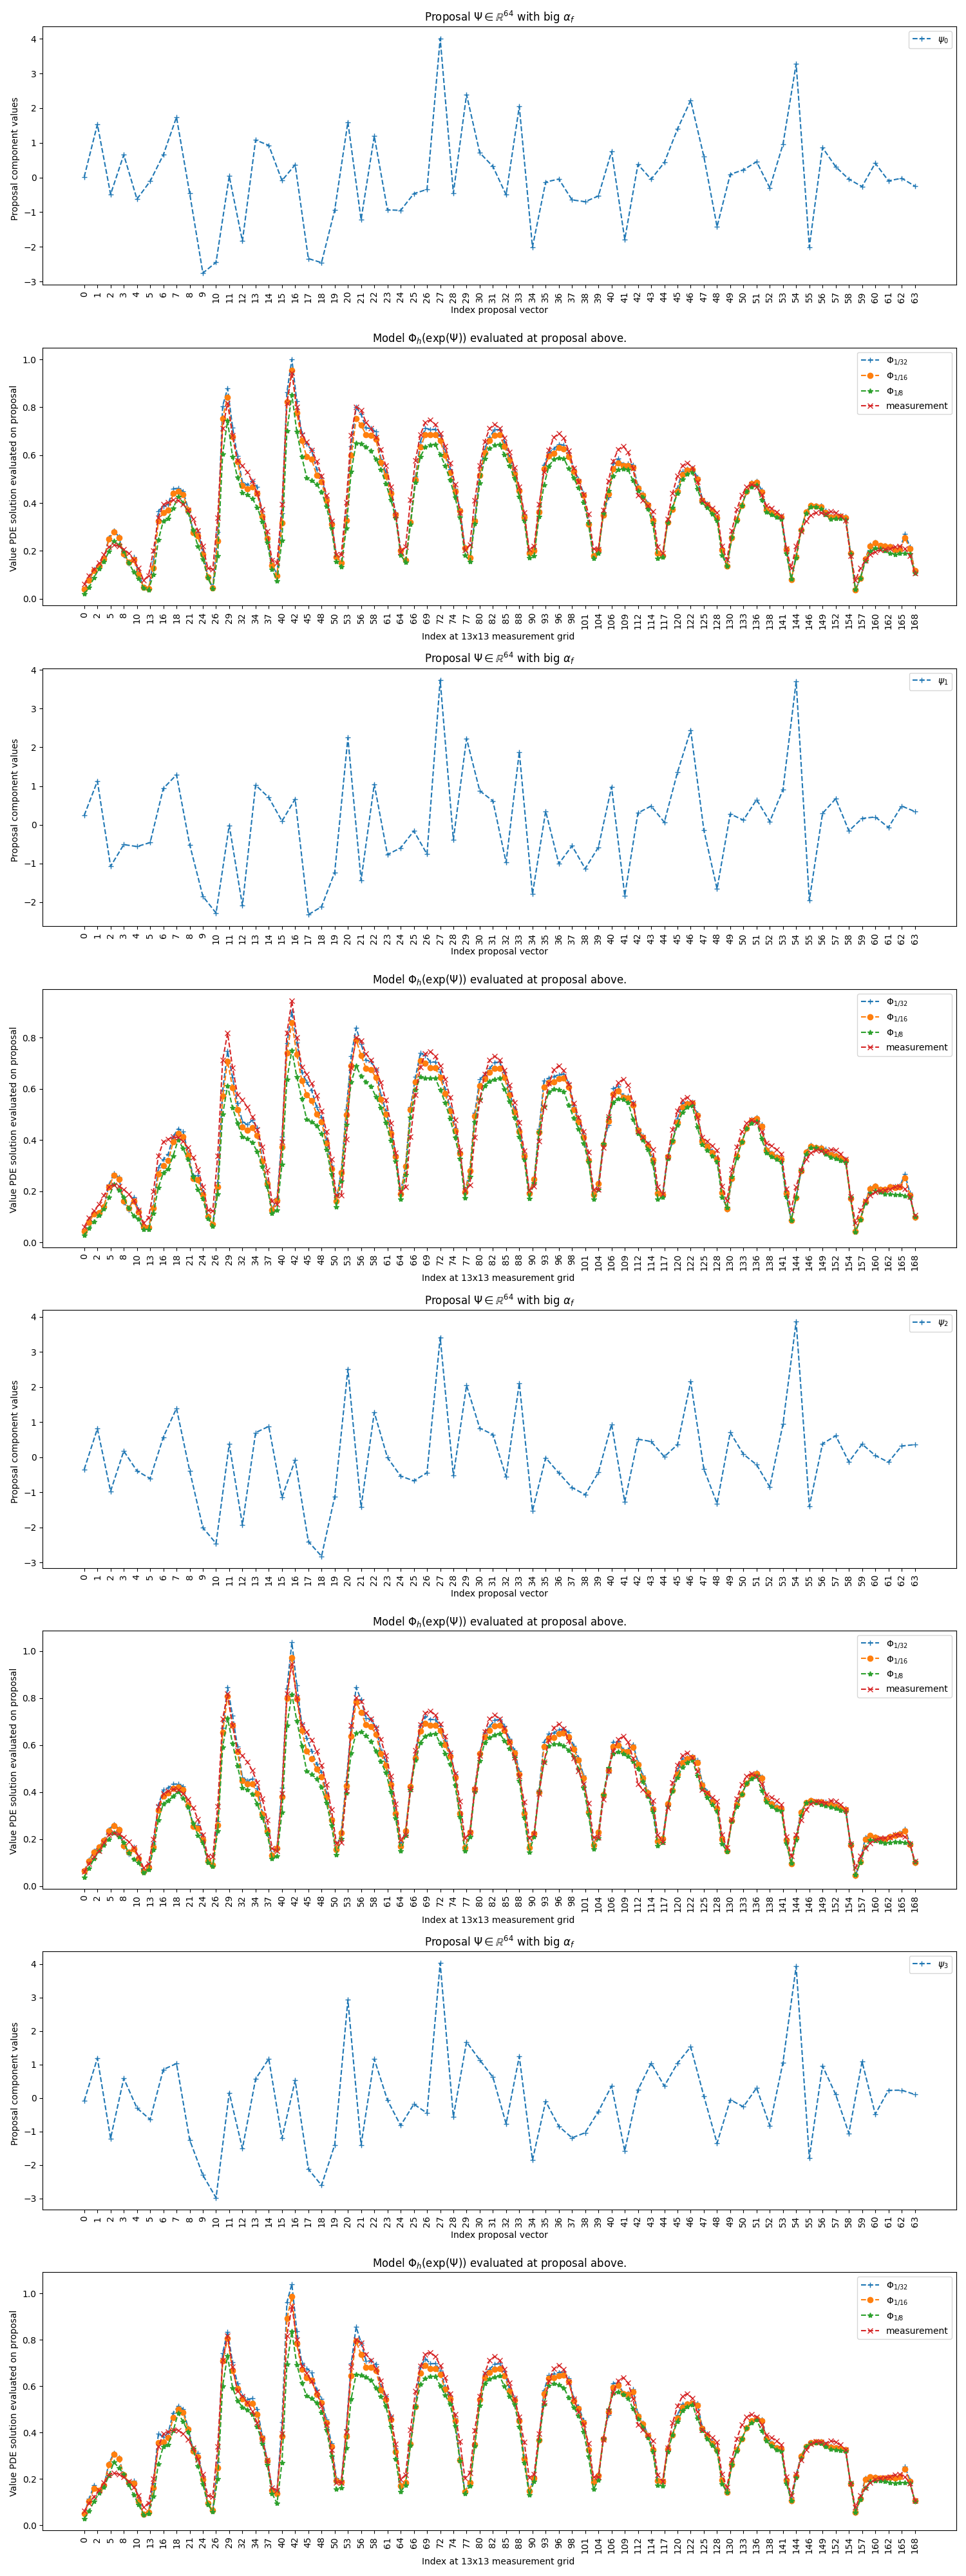

In [15]:
# psi_small stores proposals from the coarse level where alpha_f < 0.00001
psi_small = np.array([[ 0.3925939 ,  1.35117279, -0.79035986,  0.25515143, -0.34959577,
       -0.5458125 ,  0.75704505,  2.02551481, -0.65483592, -2.68066039,
       -1.91738367, -0.19122721, -2.52404229,  0.73389136,  0.95598394,
       -0.34129817,  0.06178274, -2.40679179, -1.70147947, -1.01873263,
        1.66427664, -1.60179545,  1.82223324, -0.92062991, -0.67248203,
       -0.24752637, -0.67260974,  4.13730654, -0.4311842 ,  2.02928335,
        0.59412114,  0.47980116, -0.7390084 ,  2.20196709, -2.05476596,
        0.57989761, -0.84465579, -0.12175058, -0.64994684, -0.26563875,
        0.6105949 , -2.17487951,  0.78949754,  0.41752168,  0.46383318,
        1.67582142,  2.74933585,  0.13349558, -1.15026855,  0.62009665,
        0.27800902,  0.57701887,  0.25240423,  0.71347806,  3.10949118,
       -1.48788029,  0.45093163, -0.35869825, -0.28414394,  0.18921113,
       -0.18789597, -0.09976989,  0.20029423,  0.01401847],

[ 0.36331025,  1.33743584, -1.62469411,  0.00973022, -0.68854431,
       -0.53586402,  0.77869333,  1.99324427, -0.73461569, -2.77718855,
       -1.82789982,  0.31667014, -2.0319157 ,  1.01933736,  1.08182778,
       -0.11867579,  0.41354867, -2.33565928, -1.81368564, -0.8358601 ,
        1.33425558, -1.86918569,  1.45764931, -0.53807083, -0.37223741,
       -0.22962869, -0.78924375,  4.46686673,  0.1021856 ,  2.26191475,
        0.99702549,  0.1510638 , -1.32204081,  2.41572741, -2.02424903,
       -0.25059822, -0.68482911, -0.36831625, -0.98728622,  0.19800853,
        1.04975614, -1.70105174,  0.4382821 ,  0.3434045 ,  0.43484404,
        1.50201951,  2.84131486,  0.62189695, -0.93832283,  0.30789089,
       -0.10782175,  0.10437294,  0.08661929,  0.63095849,  3.70075751,
       -1.35552806,  0.87327814, -0.43872211, -0.51339866, -0.07070413,
       -0.5517696 , -0.17621076,  0.74779097,  0.22327439],

[ 0.79376275,  1.05350645, -1.10746119, -0.10684878, -0.442438  ,
       -0.18156269,  0.12977853,  1.51290267, -0.20826779, -2.69228898,
       -1.84494359, -0.06498921, -2.44112363,  1.2291698 ,  1.07924439,
       -0.44358583,  0.44254412, -2.52917686, -1.43105822, -1.16516154,
        2.58777295, -1.74366367,  1.22753617, -0.33670811, -0.53477177,
       -0.51551834, -0.95594973,  4.36717446,  0.06737163,  2.54248244,
        0.95962034,  0.4045737 , -0.83036173,  2.27793642, -2.02821465,
        0.05597738, -0.500257  , -0.17631687, -0.48762143, -0.63485926,
        0.63085823, -2.34636668,  0.50559705,  0.09532976,  0.24051703,
        1.60841426,  3.06936783,  0.62976531, -1.51005449,  0.08803075,
        0.55496952,  0.15901962,  0.54594807,  0.58918392,  3.09846724,
       -1.21874596,  0.31924895, -0.05360478, -0.67846563,  0.32208142,
        0.40165768, -0.53890697,  0.20504117,  0.02762408],

[ 2.88084488e-01,  1.09865293e+00, -1.12157149e+00, -1.67681882e-01,
       -8.63121381e-01, -2.11645676e-02,  5.27824283e-01,  1.92897382e+00,
       -4.42726090e-01, -2.42543458e+00, -2.06521935e+00, -2.91320506e-02,
       -2.36419331e+00,  8.60551907e-01,  1.20651912e+00, -7.19793407e-01,
        3.63306791e-01, -2.53064260e+00, -1.99538317e+00, -1.03630887e+00,
        1.65537043e+00, -1.71192362e+00,  1.45097340e+00, -4.34970324e-01,
       -6.91565184e-01, -4.58167571e-01, -7.19370730e-01,  4.67411610e+00,
       -2.54456228e-02,  2.05744768e+00,  4.23462493e-01, -4.33320892e-02,
       -5.52618731e-01,  2.27519739e+00, -2.01487885e+00,  3.84460432e-01,
       -5.40277176e-01, -2.26794726e-01, -6.67751750e-01, -3.00144825e-01,
        9.66504125e-01, -1.60624956e+00,  5.60012693e-01,  4.04944502e-01,
        3.82528555e-01,  1.72304926e+00,  2.30696096e+00,  4.91469711e-01,
       -1.22909255e+00,  1.17512772e-01, -3.76249631e-01,  5.49563969e-01,
        2.20483902e-01,  4.80637576e-01,  2.92797111e+00, -1.52660207e+00,
        6.82973426e-01, -3.58087206e-01, -2.02674069e-01, -1.73725385e-02,
       -1.13493647e-01, -9.65323565e-02, -3.85120895e-03, -1.17521209e-01]])

# psi_big stores proposals from the coarse level where alpha_f > 0.21
psi_big = np.array([[ 0.01935388,  1.53268547, -0.48543121,  0.65518238, -0.62327585,
       -0.10747438,  0.65284448,  1.73877893, -0.46100379, -2.75600597,
       -2.44666506,  0.03945788, -1.83472995,  1.08083132,  0.92676081,
       -0.0877174 ,  0.36905278, -2.33899828, -2.4548632 , -0.93933856,
        1.59857087, -1.21585742,  1.19457945, -0.93221584, -0.94890142,
       -0.46592941, -0.34378031,  4.01111825, -0.44758747,  2.39142503,
        0.7130249 ,  0.3183423 , -0.49900962,  2.04781054, -2.00721172,
       -0.13053999, -0.04521364, -0.64605222, -0.69764715, -0.53307744,
        0.75121992, -1.78416414,  0.37671449, -0.05050984,  0.43237457,
        1.39714868,  2.22665691,  0.60193338, -1.41692195,  0.09064558,
        0.22072338,  0.45340085, -0.29807325,  0.95605427,  3.27539873,
       -2.0040392 ,  0.86162543,  0.31099546, -0.05026958, -0.26116012,
        0.41295094, -0.09601252, -0.02198223, -0.24658012],
   [ 0.24115591,  1.12589337, -1.07604422, -0.5140042 , -0.56426281,
       -0.46236805,  0.93842811,  1.29035612, -0.51517111, -1.85099729,
       -2.28394799, -0.0155374 , -2.09092881,  1.02358694,  0.70271147,
        0.09139115,  0.66389438, -2.32539623, -2.1214273 , -1.23222862,
        2.25028333, -1.43653162,  1.046363  , -0.7729436 , -0.59979545,
       -0.16239255, -0.76040307,  3.74102751, -0.38527832,  2.22765596,
        0.87598413,  0.61422101, -0.97397744,  1.88181582, -1.7966686 ,
        0.34799904, -1.00809154, -0.5473359 , -1.13648987, -0.58252962,
        0.97908747, -1.83574153,  0.303739  ,  0.48173225,  0.06373067,
        1.35726312,  2.44617134, -0.13850221, -1.6583189 ,  0.27722172,
        0.11811521,  0.64906547,  0.08174488,  0.90608639,  3.69952046,
       -1.95887671,  0.2930858 ,  0.67114037, -0.15872475,  0.16220527,
        0.2002796 , -0.06944014,  0.48292588,  0.34178651],
[-0.34822498,  0.81126055, -0.97134685,  0.17457857, -0.39323255,
       -0.60917535,  0.56989706,  1.39075268, -0.38815804, -2.01087464,
       -2.46066043,  0.37034449, -1.9310524 ,  0.69859387,  0.87714314,
       -1.14734816, -0.08435685, -2.40651621, -2.82547733, -1.12976506,
        2.51054625, -1.42686835,  1.27603824, -0.01249864, -0.54043679,
       -0.67471242, -0.44640947,  3.41693834, -0.52600611,  2.04470022,
        0.82665404,  0.64375626, -0.5610967 ,  2.11298931, -1.52886735,
       -0.01620047, -0.45444886, -0.86834261, -1.0699264 , -0.43753437,
        0.93871155, -1.27476703,  0.5123856 ,  0.44523376,  0.01315526,
        0.35756464,  2.15164811, -0.33960992, -1.32011558,  0.70270669,
        0.08313577, -0.21615341, -0.85236176,  0.94147183,  3.8652369 ,
       -1.40557038,  0.38235228,  0.6087098 , -0.13414583,  0.37200109,
        0.04717714, -0.14347653,  0.31797524,  0.35648792],
 [-0.09170763,  1.18496472, -1.21225675,  0.58058225, -0.30492997,
       -0.64711385,  0.84622235,  1.0228722 , -1.2579878 , -2.30706328,
       -2.98543015,  0.1530607 , -1.51565103,  0.56235262,  1.16395977,
       -1.20736357,  0.52143258, -2.12599396, -2.61420838, -1.40381223,
        2.92517604, -1.40642394,  1.15659214, -0.06776951, -0.8260665 ,
       -0.18915619, -0.45479377,  4.02113976, -0.56648053,  1.67159511,
        1.13157845,  0.61618109, -0.77329776,  1.23585275, -1.85999682,
       -0.10815372, -0.84968586, -1.19482636, -1.04110248, -0.40692399,
        0.35439231, -1.58283533,  0.23653206,  1.0369581 ,  0.35087296,
        1.03585435,  1.52197066,  0.05116356, -1.35556255, -0.05797918,
       -0.2662376 ,  0.29658558, -0.83037575,  1.05657629,  3.92464186,
       -1.79259336,  0.95197524,  0.09817752, -1.0596395 ,  1.08044279,
       -0.48730514,  0.224564  ,  0.22878012,  0.10012542]])

z_hat = np.loadtxt('z_hat.txt')
# plot proposals corresponding to small acceptance rate on fine level
fig, ax = plt.subplots(nrows=8,ncols=1, figsize=(15,40))

ctr = 0
for i in range(0,psi_small.shape[0]*2,2):
        ax[i].plot(np.linspace(1,64,64), psi_small[ctr,:], '+--', label=r'$\psi_%d$'%ctr)
        ax[i].set_xticks(np.linspace(1,64,64), [r'%d'%i for i in range(64)], rotation=90)
        ax[i].set_ylabel('Proposal component values  ')
        ax[i].set_xlabel('Index proposal vector')
        ax[i].set_title(r'Proposal $\Psi \in \mathbb{R}^{64}$ with small $\alpha_f$' )
        ax[i].legend()

        ax[i+1].plot(np.linspace(1,169,169), fm32(psi_small[ctr,:]), '+--', label=r'$\Phi_{1/32}$')
        ax[i+1].plot(np.linspace(1,169,169),fm16(psi_small[ctr,:]), 'o--', label=r'$\Phi_{1/16}$')
        ax[i+1].plot(np.linspace(1,169,169),fm8(psi_small[ctr,:]), '*--', label=r'$\Phi_{1/8}$')
        ax[i+1].plot(np.linspace(1,169,169),z_hat, 'x--', label='measurement')
        ax[i+1].set_xticks(np.linspace(1,169,64), np.linspace(1,169,64, dtype=np.int64) -1, rotation=90)
        ax[i+1].set_ylabel('Value PDE solution evaluated on proposal ')
        ax[i+1].set_xlabel('Index at 13x13 measurement grid ')
        ax[i+1].set_title(r'Model $\Phi_h(\exp(\Psi))$ evaluated at proposal above.')
        ax[i+1].legend()
        ctr+=1
        fig.tight_layout()

# plot proposals corresponding to big acceptance rate on fine level
fig, ax = plt.subplots(nrows=8,ncols=1, figsize=(15,40))

ctr = 0
for i in range(0,psi_big.shape[0]*2,2):
        ax[i].plot(np.linspace(1,64,64), psi_big[ctr,:], '+--', label=r'$\psi_%d$'%ctr)
        ax[i].set_xticks(np.linspace(1,64,64), [r'%d'%i for i in range(64)], rotation=90)
        ax[i].set_ylabel('Proposal component values  ')
        ax[i].set_xlabel('Index proposal vector')
        ax[i].set_title(r'Proposal $\Psi \in \mathbb{R}^{64}$ with big $\alpha_f$')
        ax[i].legend()

        ax[i+1].plot(np.linspace(1,169,169), fm32(psi_big[ctr,:]), '+--', label=r'$\Phi_{1/32}$')
        ax[i+1].plot(np.linspace(1,169,169),fm16(psi_big[ctr,:]), 'o--', label=r'$\Phi_{1/16}$')
        ax[i+1].plot(np.linspace(1,169,169),fm8(psi_big[ctr,:]), '*--', label=r'$\Phi_{1/8}$')
        ax[i+1].plot(np.linspace(1,169,169),z_hat, 'x--', label='measurement')
        ax[i+1].set_xticks(np.linspace(1,169,64), np.linspace(1,169,64, dtype=np.int64) -1, rotation=90)
        ax[i+1].set_ylabel('Value PDE solution evaluated on proposal ')
        ax[i+1].set_xlabel('Index at 13x13 measurement grid ')
        ax[i+1].set_title(r'Model $\Phi_h(\exp(\Psi))$ evaluated at proposal above.')
        ax[i+1].legend()
        ctr+=1
        fig.tight_layout()
